### Importación de datos



In [2]:

import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

# función para leer el csv
def leer_csv(url):
    datos = []
    try:
        with urlopen(url) as respuesta:
            lineas = respuesta.read().decode('utf-8').splitlines()
            lector = csv.DictReader(lineas)
            for fila in lector:
                datos.append(fila)
    except Exception as e:
        print(f"Error al leer el CSV: {e}")
    return datos

In [4]:
from matplotlib import pyplot as plt

#1. Análisis de facturación



In [5]:

facturacionTienda1 = tienda['Precio'].astype(float).sum()
facturacionTienda2 = tienda2['Precio'].astype(float).sum()
facturacionTienda3 = tienda3['Precio'].astype(float).sum()
facturacionTienda4 = tienda4['Precio'].astype(float).sum()


print(f"Facturación Tienda 1: ${facturacionTienda1:.2f}")
print(f"Facturación Tienda 2: ${facturacionTienda2:.2f}")
print(f"Facturación Tienda 3: ${facturacionTienda3:.2f}")
print(f"Facturación Tienda 4: ${facturacionTienda4:.2f}")



Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00


# 2. Ventas por categoría

In [6]:
tienda1=tienda.groupby('Categoría del Producto')['Precio'].sum()
tienda2=tienda2.groupby('Categoría del Producto')['Precio'].sum()
tienda3=tienda3.groupby('Categoría del Producto')['Precio'].sum()
tienda4=tienda4.groupby('Categoría del Producto')['Precio'].sum()
print(f'tienda 1 por {tienda1}')
print(f'tienda 2 por {tienda2}')
print(f'tienda 3 por {tienda3}')
print(f'tienda 4 por {tienda4}')

tienda 1 por Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64
tienda 2 por Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64
tienda 3 por Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               410775800.0
Instrumentos musicales      77380900.0
Juguetes       

# 3. Calificación promedio de la tienda


In [8]:
def calificacionPromedio(tienda, numero):
    promedio =tienda['Calificación'].mean()
    print(f"Clasificación promedio en Tienda {numero}: {promedio:.2f}")

calificacionPromedio(tienda, 1)
calificacionPromedio(tienda2, 2)
calificacionPromedio(tienda3, 3)
calificacionPromedio(tienda4, 4)

# 4. Productos más y menos vendidos

In [9]:

dfTotal = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

dfTotal['Precio'] = dfTotal['Precio'].astype(float)
dfTotal['Cantidad de cuotas'] = dfTotal['Cantidad de cuotas'].astype(int)

dfTotal['Ingreso'] = dfTotal['Precio']

ventas = dfTotal.groupby(['Tienda', 'Producto'])['Ingreso'].sum().reset_index()

def topProductos(tienda):
    data = ventas[ventas['Tienda'] == tienda]

    topMasVendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
    topMenosVendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

    print(f'\n{tienda} - Los 3 productos que más se vendieron:')
    for _, fila in topMasVendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

    print(f'\n{tienda} - los 3 productos que menos se vendieron:')
    for _, fila in topMenosVendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

tiendas_unicas = ventas['Tienda'].unique()
for tienda in tiendas_unicas:
    topProductos(tienda)


Tienda 1 - Los 3 productos que más se vendieron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - los 3 productos que menos se vendieron:
  Cuerda para saltar - Ingresos: $652800.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cubo mágico 8x8 - Ingresos: $696900.00

Tienda 2 - Los 3 productos que más se vendieron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - los 3 productos que menos se vendieron:
  Cubo mágico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - Los 3 productos que más se vendieron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - los 3 productos que menos se vendieron:
  Cubo mágico 8x8 - Ingresos: $640400.00
  Dinosaurio Rex - Ingresos: $795600.00
  Cue

# 5. Envío promedio por tienda

In [10]:
dfTotal['Costo de envío'] = dfTotal['Costo de envío'].astype(float)

envioPromedio = dfTotal.groupby('Tienda')['Costo de envío'].mean()

print('El envío promedio por tienda es:')
for tienda, promedio in envioPromedio.items():
    print(f"{tienda}: ${promedio:.2f}")

El envío promedio por tienda es:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


##**Graficas del análisis**

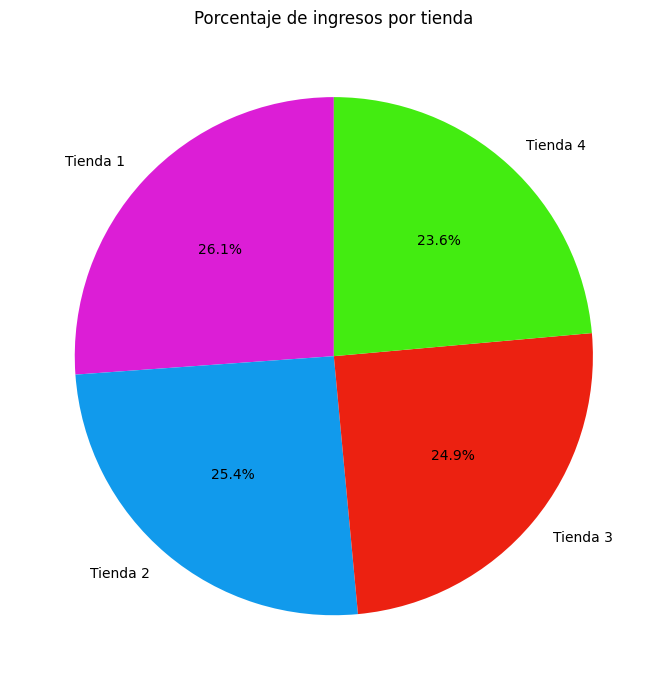

In [11]:
#facturacion por tienda
ingresosTotales = dfTotal.groupby('Tienda')['Ingreso'].sum()
ingresoPromedio = dfTotal.groupby('Tienda')['Ingreso'].mean()
distribucionIngresos = ingresosTotales

colors = ['#dc1ed6', '#119aec', '#ec2111', '#43ec11']
plt.figure(figsize=(7,7))
distribucionIngresos.plot(kind='pie', autopct='%1.1f%%', startangle=90,colors=colors)
plt.title('Porcentaje de ingresos por tienda')
plt.ylabel('')
plt.tight_layout()
plt.show()

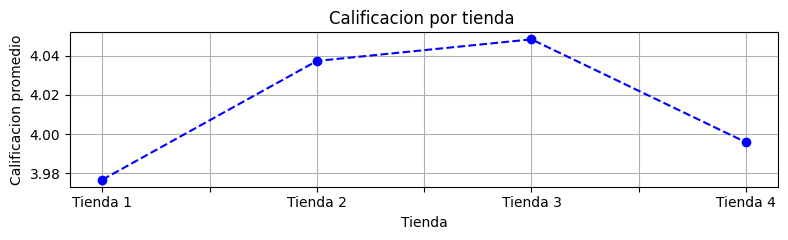

In [12]:
#calificación por tienda
calificacionPromedio= dfTotal.groupby('Tienda')['Calificación'].mean()
plt.figure(figsize=(8,2.5))
calificacionPromedio.plot(kind='line', marker='o', linestyle='--', color='blue')
plt.title('Calificacion por tienda ')
plt.ylabel('Calificacion promedio')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

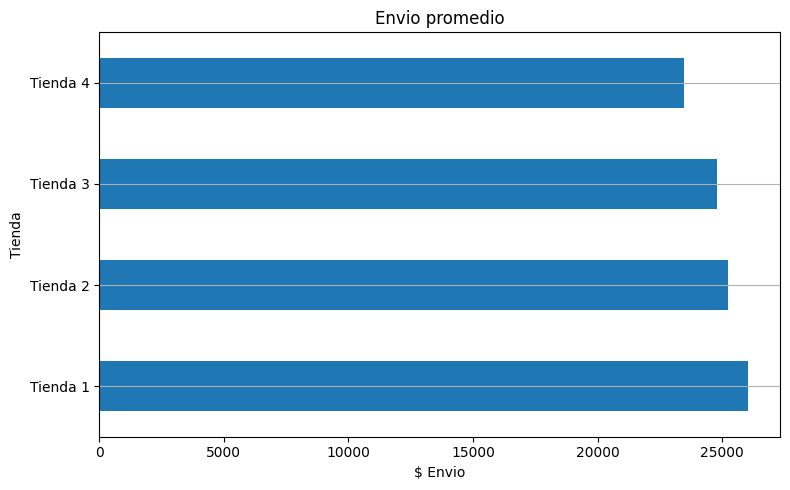

In [13]:
#envio promedio de entrega
envioPromedio= dfTotal.groupby('Tienda')['Costo de envío'].mean()
plt.figure(figsize=(8,5))
envioPromedio.plot(kind='barh')
plt.title('Envio promedio')
plt.ylabel('Tienda')
plt.xlabel('$ Envio')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **INFORME FINAL**

## **Introducción:**
El siguiente informe se realiza con el objetivo de poder brindarle al sr. juan una orientación más objetiva sobre su problemática de esta manera poder proponer la mejor solución sobre cual es de las cuatro tiendas es más recomendable vender.
Para poder brindarle la orientación correcta se tomaron en cuenta los siguientes puntos:
* Facturación por cada tienda
* Ventas por categoría
* Calificación promedio de la tienda
* Productos más y menos vendidos
* Envió promedio por tienda


### Ingresos totales
En el análisis de ingresos totales por tienda se obtuvieron los siguientes resultados:

* Facturación Tienda 1: 1150880400.00
* Facturación Tienda 2: 1116343500.00
* Facturación Tienda 3: 1098019600.00
* Facturación Tienda 4: 1038375700.00

Como se puede observar la tienda uno y dos son las que registran un mayor ingreso seguida por la tienda tres la cual baja su ingreso, pero no es tanta la brecha que se tiene como en el caso de la tienda 4 donde podemos observar que registra menor ingreso, hablando en porcentajes del 100% de las ventas esta solo aporta el 23.6%


### Ventas por categoria

Analizando las ventas podemos observar que en las cuatro tiendas resaltan las mismas categorías por lo cual concluimos que hay una tendencia en las preferencias por parte del consumidor, las categorías más vendidas son:
* Artículos para el hogar     
* Deportes y diversión        
* Electrodomésticos          
* Electrónicos               
* Instrumentos musicales     
* Juguetes                    
* Libros                     
* Muebles  

Al igual podemos observar que hay una similitud en los artículos más y menos vendidos de las tiendas.

En la tienda 1 podemos observar que los artículos más vendidos son con el primer puesto las TV LED UHD 4K seguida de refrigerador y iPhone 15.

En la tienda 2 se tienen los mismos artículos con la diferencia que el iPhone 15 es su producto más vendido y la TV LED UHD 4K el subsecuente, así como el refrigerador.

En tienda 3 los artículos también coinciden solo que en esta el Refrigerador es el producto más vendido seguido de la TV LED UHD 4K y iPhone 15.

En la tienda 4 tenemos un ligero cambio ya podemos observar que el refrigerador sale del top 3 de los más vendidos así que este top queda de la siguiente manera iPhone 15, TV LED UHD 4K, Smart TV

Para el top de los menos vendidos todas las tiendan reportan que son Cuerda para saltar, Cubo mágico 8x8, Dinosaurio Rex.


### Calificación por tienda

Para poder tomar un promedio de calificación por cada tienda se usó las puntuaciones que los clientes le dieron a cada una de ellas.

En este caso la tienda que destaca con mejor calificación es la numero 3 con una con una puntuación de 4.05 seguida por la tienda 2 con una puntuación de 4.04 a continuación la tienda 4 con la puntuación de 4.00 y al final la tienda 1 con puntuación 3.98 como podemos notar la diferencia que se tiene entre la tienda 3 y 1 es de .07 dando entender que en la tienda 3 pueden dar mejor servicio.


### Envio promedio por tienda

La tienda que reporta mejor precio en envió es la numero 4 con un costo de 23459.46 seguido por tienda 3, 2 y la tienda que reporta un coste de envió más caro es la tienda 1 con un coste de 26018.61

### Conclusión

Con el análisis anterior podemos concluir que la tienda 1 es la que mejor rendimiento tiende en cuanto a ventas a pesar de que no es la tienda que tiene mejor calificación por parte de los clientes, se sugiere que se invierta más en el aspecto de servicio para mejorar la experiencia que se tenga al comprar.

La tienda 2 es la segunda tienda que reporta buenas ganancias además de obtener el segundo lugar en calificación, su envió promedio se encuentra entre los más caros, pero no el más caro.

la tienda 3 destaca por haber obtenido la calificación promedio más alta y no es la tienda que factura menos además de que se encuentra en los entre los envíos más baratos.

La tienda 4 sobresale por ser la tienda con él envió más económico que se tiene, se encuentra en la posición 3 del promedio de calificaciones de las cuarto tiendas, pero aun así el rendimiento económico es bajo colocándola como la tienda con menor ganancias.

Contando con lo anterior podemos sugerir al sr juan que la tienda que recomendamos vender es la número 4 ya que a pesar de contar con puntos sobresalientes esta no genera las mismas ganancias que las tiendas 1,2 y 3.


